## Problem Statement
- Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.
- There are two problems that we need to tackle: 
1. Create a customer profile and based on the profile recommend product to him/her
2. Construct two-way contigency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.
3. Metrics will be analysing data to give insights on which products to recommend to which particular user based on its characteristics

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('aerofit_treadmill.csv')

In [7]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [9]:
# There are 180 data points and 9 features in the dataset
df.shape

(180, 9)

In [11]:
# We can see there are no Null values in the dataset and data consists of object and int values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [17]:
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [18]:
df.describe(include='int64')

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


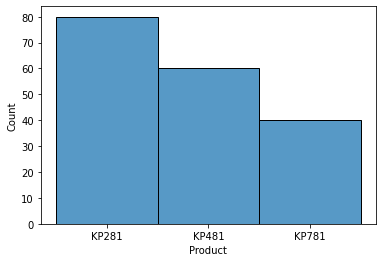

In [21]:
sns.histplot(data=df, x="Product")
plt.show()

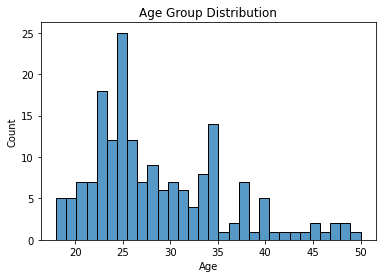

In [93]:
sns.histplot(data=df, x="Age",bins=30)
plt.title("Age Group Distribution")
plt.show()

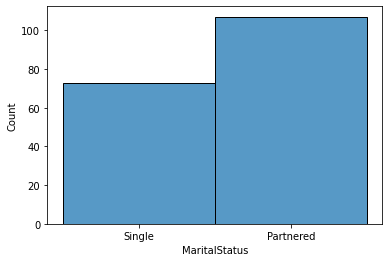

In [23]:
sns.histplot(data=df, x="MaritalStatus")
plt.show()

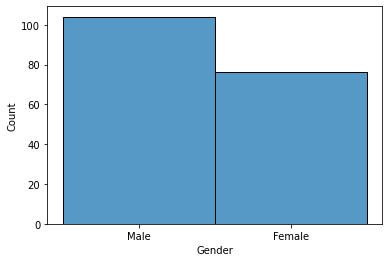

In [24]:
sns.histplot(data=df, x="Gender")
plt.show()

## Outlier Detection
- For outlier detection, we'll mainly focus on numerical data i.e. Age, Education, Usage, Fitness, Income, Miles

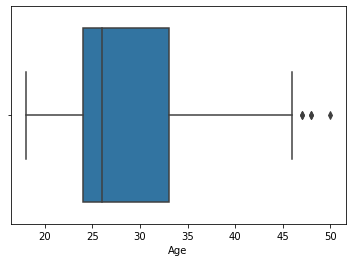

In [26]:
# We can see that there are 3 outliers but they are possible values since even some 45+ also work on their fitness
sns.boxplot(x='Age',data=df)
plt.show()

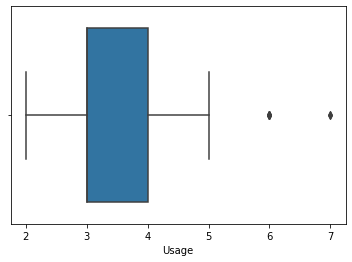

In [28]:
sns.boxplot(x='Usage',data=df)
plt.show()

In [32]:
df[df['Usage'].isin([6,7])]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
154,KP781,25,Male,18,Partnered,6,4,70966,180
155,KP781,25,Male,18,Partnered,6,5,75946,240
162,KP781,28,Female,18,Partnered,6,5,92131,180
163,KP781,28,Male,18,Partnered,7,5,77191,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
175,KP781,40,Male,21,Single,6,5,83416,200


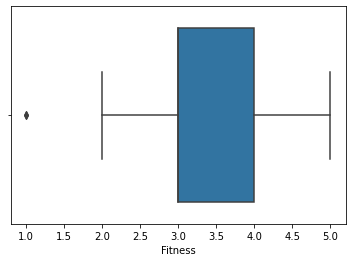

In [29]:
sns.boxplot(x='Fitness',data=df)
plt.show()

In [40]:
df[df['Fitness']==1]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
14,KP281,23,Male,16,Partnered,3,1,38658,47
117,KP481,31,Female,18,Single,2,1,65220,21


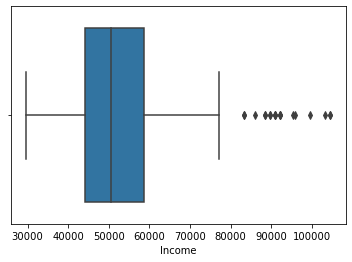

In [30]:
sns.boxplot(x='Income',data=df)
plt.show()

In [41]:
df[df['Income']>80000]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160
169,KP781,30,Male,18,Partnered,5,5,99601,150
170,KP781,31,Male,16,Partnered,6,5,89641,260


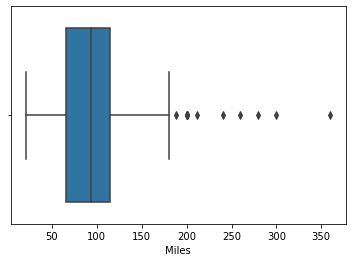

In [31]:
sns.boxplot(x='Miles',data=df)
plt.show()

In [42]:
df[df['Miles']>190]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
84,KP481,21,Female,14,Partnered,5,4,34110,212
142,KP781,22,Male,18,Single,4,5,48556,200
148,KP781,24,Female,16,Single,5,5,52291,200
152,KP781,25,Female,18,Partnered,5,5,61006,200
155,KP781,25,Male,18,Partnered,6,5,75946,240
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200
173,KP781,35,Male,16,Partnered,4,5,92131,360


<div class="alert alert-block alert-success">
<b>Insight:</b> - In the above analysis we can see that the fitter the person, the more miles he runs and more the usage. This indicates that the Usage, Fitness and miles are highly correlated. We'll use more statistical Methods to verify this.
</div>

## Checking for impact of marital Status and Age

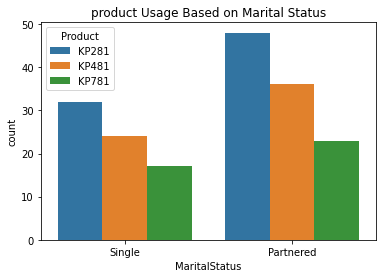

In [95]:
sns.countplot(x='MaritalStatus',data=df,hue='Product')
plt.title("product Usage Based on Marital Status")
plt.show()

<div class="alert alert-block alert-success">
<b>Insight:</b> - In the above analysis we can see that marital Status Doesn't have much impact on the usage distribution of product. 
</div>

<AxesSubplot:xlabel='Gender', ylabel='count'>

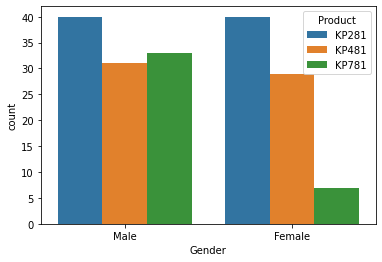

In [48]:
sns.countplot(x='Gender',data=df,hue='Product')

<div class="alert alert-block alert-success">
<b>Insight:</b> - In the above analysis we can see that Female Don't prefer to use KP781 in comparison to Male
</div>

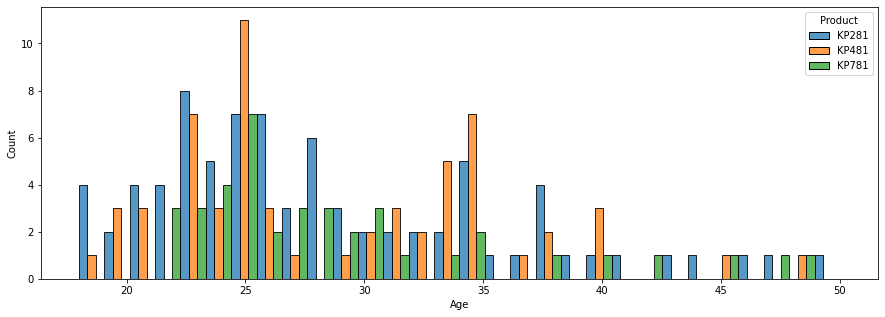

In [70]:
plt.figure(figsize=(15,5))
sns.histplot(x='Age',hue='Product',data=df,multiple='dodge',bins=30)
plt.show()

<div class="alert alert-block alert-success">
<b>Insight:</b> - In the above analysis we can see that People below 25 Prefer to use KP281 whereas People at the age of 25 Prefer KP481 and there KP781 is not dominant in any age group
</div>

In [71]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [74]:
pd.crosstab(df['Product'],df['Gender'])

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


<div class="alert alert-block alert-success">
<b>Insight:</b> - In the above analysis we can see that KP781 is mostly preferred my Male</div>

In [75]:
pd.crosstab(df['Product'],df['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


In [76]:
pd.crosstab(df['Product'],df['Fitness'])

Fitness,1,2,3,4,5
Product,,,,,
KP281,1,14,54,9,2
KP481,1,12,39,8,0
KP781,0,0,4,7,29


<div class="alert alert-block alert-success">
<b>Insight:</b> - In the above analysis we can see that Highly fit people prefer KP781 and low or medium fit people prefer KP281 and KP481
</div>

## Plotting heatmap to display correlation

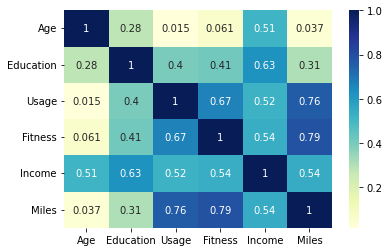

In [80]:
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.show()

<div class="alert alert-block alert-success">
<b>Insight:</b> - In the above analysis we can see observe the following points.<br/>
1. There is. high correlation between Fitness, Usage and Miles.<br/>
2. Age also plays an important role in fitness with some outliers present in the data.
</div>

In [84]:
df['Age_bins'] = pd.cut(df.Age, bins=10,
                                 labels=False, include_lowest=True)

In [87]:
crosstab_ptable = pd.crosstab(df["Product"], df["Age_bins"], margins=True, normalize=True)
crosstab_ptable

Age_bins,0,1,2,3,4,5,6,7,8,9,All
Product,,,,,,,,,,,
KP281,0.055556,0.094444,0.094444,0.061111,0.044444,0.027778,0.033333,0.011111,0.011111,0.011111,0.444444
KP481,0.038889,0.055556,0.083333,0.016667,0.072222,0.027778,0.027778,0.000000,0.005556,0.005556,0.333333
KP781,0.000000,0.055556,0.066667,0.044444,0.016667,0.005556,0.011111,0.005556,0.005556,0.011111,0.222222
All,0.094444,0.205556,0.244444,0.122222,0.133333,0.061111,0.072222,0.016667,0.022222,0.027778,1.000000


<div class="alert alert-block alert-success">
<b>Insight:</b> - In the above analysis we can see observe the following points.<br/>
1. About 25% of the Product is consumed by 24-26 years age group and the Prefer the sequence in the following order KP281>KP481>KP781.<br/>
</div>

In [88]:
crosstab_ptable = pd.crosstab(df["Product"], df["Gender"], margins=True, normalize=True)
crosstab_ptable

Gender,Female,Male,All
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.161111,0.172222,0.333333
KP781,0.038889,0.183333,0.222222
All,0.422222,0.577778,1.000000


<div class="alert alert-block alert-success">
<b>Insight:</b> - In the above analysis we can see observe the following points.<br/>
1.KP781 is mostly preferred by Males whereas KP281 and KP481 are almost equally liked by both male and females<br/>
</div>

In [89]:
crosstab_ptable = pd.crosstab(df["Product"], df["MaritalStatus"], margins=True, normalize=True)
crosstab_ptable

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.266667,0.177778,0.444444
KP481,0.200000,0.133333,0.333333
KP781,0.127778,0.094444,0.222222
All,0.594444,0.405556,1.000000


<div class="alert alert-block alert-success">
<b>Insight:</b> - In the above analysis we can see observe the following points.<br/>
1. Partnered people are more likely to buy to a product in the following order KP281>KP481>KP781<br/>
</div>

In [91]:
crosstab_ptable = pd.crosstab(df["Product"], df["Fitness"], margins=True, normalize=True)
crosstab_ptable

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.005556,0.077778,0.300000,0.050000,0.011111,0.444444
KP481,0.005556,0.066667,0.216667,0.044444,0.000000,0.333333
KP781,0.000000,0.000000,0.022222,0.038889,0.161111,0.222222
All,0.011111,0.144444,0.538889,0.133333,0.172222,1.000000


<div class="alert alert-block alert-success">
<b>Insight:</b> - In the above analysis we can see observe the following points.<br/>
1.KP781 is mostly preferred by highly fit People<br/>
2. KP281 and KP481 are mostly preferred by low/medium fitness
</div>